In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
base_bank = pd.read_csv("../01_base/bank.csv")

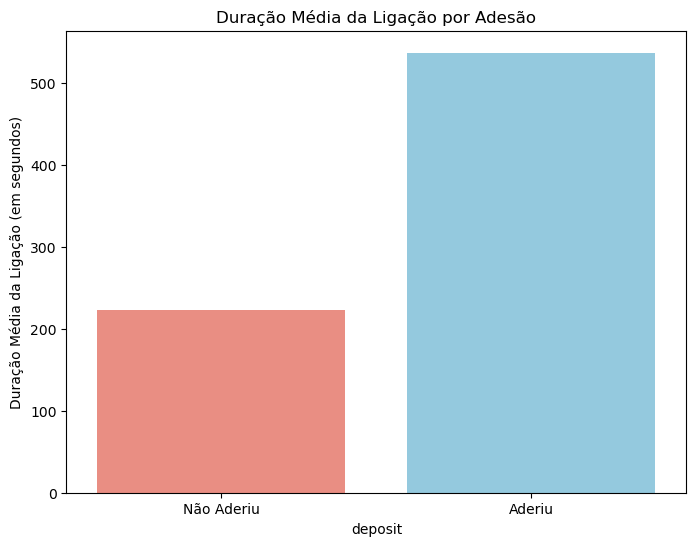

In [3]:
#* 📌 **Exercício 16:** Duração da ligação (`duration`) influencia a adesão? Mostrar em gráfico.

duracao_media = base_bank.groupby("deposit")["duration"].mean()

plt.figure(figsize=(8, 6))
sns.barplot(x=duracao_media.index, y=duracao_media.values, hue=duracao_media.index, palette=["salmon", "skyblue"], legend=False)
plt.title("Duração Média da Ligação por Adesão")
plt.ylabel('Duração Média da Ligação (em segundos)')
plt.xticks(ticks=[0, 1], labels=['Não Aderiu', 'Aderiu'])
plt.savefig("../03_saida/adesao_duracao.png", dpi=300, bbox_inches="tight")
plt.show()

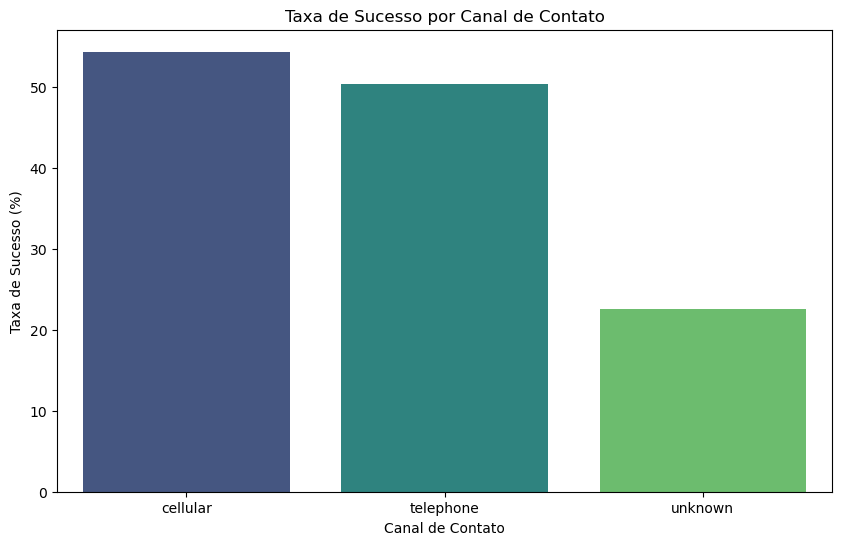

In [4]:
#* 📌 **Exercício 17:** Qual o melhor canal de contato (`contact`) para novas campanhas?

contagem_contato = base_bank.groupby(['contact', 'deposit']).size().unstack(fill_value=0)

contagem_contato['taxa_sucesso'] = (contagem_contato['yes'] / (contagem_contato['yes'] + contagem_contato['no'])) * 100

plt.figure(figsize=(10, 6))
sns.barplot(
    x=contagem_contato.index,
    y=contagem_contato['taxa_sucesso'],
    hue=contagem_contato.index, 
    palette='viridis',
    legend=False
)
plt.title('Taxa de Sucesso por Canal de Contato')
plt.xlabel('Canal de Contato')
plt.ylabel('Taxa de Sucesso (%)')
plt.show()